In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/animal-dataset/animal-dataset'):
     print(dirname)
     print(f"Number of files: {len(filenames)}")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animal-dataset/animal-dataset
Number of files: 0
/kaggle/input/animal-dataset/animal-dataset/test
Number of files: 0
/kaggle/input/animal-dataset/animal-dataset/test/Nilgiri_tahr
Number of files: 9
/kaggle/input/animal-dataset/animal-dataset/test/parrot
Number of files: 10
/kaggle/input/animal-dataset/animal-dataset/test/Warthog
Number of files: 10
/kaggle/input/animal-dataset/animal-dataset/test/Mouse deer
Number of files: 10
/kaggle/input/animal-dataset/animal-dataset/test/chameleon
Number of files: 10
/kaggle/input/animal-dataset/animal-dataset/test/fox
Number of files: 11
/kaggle/input/animal-dataset/animal-dataset/test/wolf
Number of files: 10
/kaggle/input/animal-dataset/animal-dataset/test/hedgehog
Number of files: 10
/kaggle/input/animal-dataset/animal-dataset/test/turtle
Number of files: 11
/kaggle/input/animal-dataset/animal-dataset/test/Cheetah
Number of files: 10
/kaggle/input/animal-dataset/animal-dataset/test/snake
Number of files: 10
/kaggle/input/animal-da

In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from torch import nn
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.models as models
from tqdm.auto import tqdm

In [3]:
transforms_=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
    
])

In [4]:
from PIL import Image

def pil_loader(path: str) -> Image.Image:
    with open(path, "rb") as f:
        img = Image.open(f)
        img = img.convert("RGBA")  
        return img.convert("RGB")  

In [6]:
train_dataset=ImageFolder(root='/kaggle/input/animal-dataset/animal-dataset/train',transform=transforms_,target_transform=None,loader=pil_loader)
test_dataset=ImageFolder(root='/kaggle/input/animal-dataset/animal-dataset/test',transform=transforms_,target_transform=None,loader=pil_loader)
print(f"Length of Train dataset:{len(train_dataset)}")
print(f"Length of test Datasset:{len(test_dataset)}")

Length of Train dataset:65799
Length of test Datasset:1532


In [7]:
class_list=train_dataset.classes
print(class_list)

['Aardwolf', 'Alpaca', 'Armadillo', 'Baboon', 'Bighorn Sheep', 'Binturong', 'Bobcat', 'Camel', 'Capybara', 'Caracal', 'Cheetah', 'Cougar', 'Dugong', 'Eland', 'Fennec Fox', 'Galago (Bushbaby)', 'Gaur', 'Gerenuk', 'Gibbon', 'Giraffe', 'Grizzly Bear', 'Honey Badger', 'Ibex', 'Jackal', 'Jaguar', 'Jerboa', 'King Cobra', 'Kinkajou', 'Klipspringer', 'Kudu', 'Lemur', 'Lion-tailed macaque', 'Llama', 'Lynx', 'Margay', 'Meerkat', 'Mongoose', 'Mouse deer', 'Mule Deer', 'Musk Ox', 'Nilgai', 'Nilgiri Langur', 'Nilgiri_tahr', 'Nyala', 'Pangolin', 'Patagonian Mara', 'Peacock', 'Peccary', 'Platypus', 'Polar Bear', 'Pronghorn', 'Puma', 'Quokka', 'Quoll', 'Red Panda', 'Ring-tailed Lemur', 'Rock Hyrax', 'Sloath_bear', 'Sloth', 'Snow Leopard', 'Squirrel Monkey', 'Striped Hyena', 'Takin', 'Tapir', 'Tasmanian Devil', 'Tenrec', 'Toad', 'Tortoise', 'Vicuna', 'Warthog', 'Wolverine', 'Xenoceratops', 'Yak', 'aardavark', 'ant', 'antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'ca

In [8]:
class_dict=train_dataset.class_to_idx

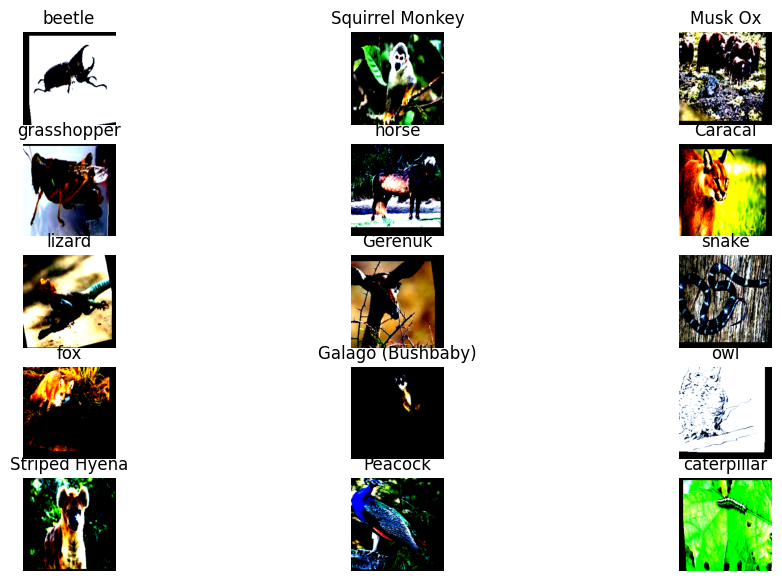

In [9]:
plt.figure(figsize=(12,7))
nrows,ncols,idx=5,3,1

for i in range(1,16):
    plt.subplot(nrows,ncols,i)
    rand_idx=np.random.randint(0,len(train_dataset))
    img,label=train_dataset[rand_idx]
    plt.imshow(img.permute(1,2,0).numpy())
    plt.title(class_list[label])
    plt.axis('off')

In [10]:
torch.cuda.manual_seed(42)
BATCH_SIZE=32

train_dataloader=DataLoader(dataset=train_dataset,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(dataset=test_dataset,batch_size=BATCH_SIZE,shuffle=False)
print(f"No of batches for train_dataloader:{len(train_dataloader)}")
print(f"No of batches for test dataloader:{len(test_dataloader)}")

No of batches for train_dataloader:2057
No of batches for test dataloader:48


In [11]:
img_batch,label_batch=next(iter(train_dataloader))
print(img_batch.shape)
print(label_batch.shape)

torch.Size([32, 3, 224, 224])
torch.Size([32])


In [12]:
resnet_weights=models.ResNet50_Weights.DEFAULT

In [13]:
myresnet=models.resnet50(weights=resnet_weights)
myresnet.fc,myresnet.fc.in_features

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 127MB/s] 


(Linear(in_features=2048, out_features=1000, bias=True), 2048)

In [14]:
class WildResNet(nn.Module):
    def __init__(self,num_classes,resnet_weights):
        super().__init__()
        self.model=models.resnet50(weights=resnet_weights)
        self.model.fc=nn.Linear(in_features=self.model.fc.in_features,out_features=num_classes)
        
    def forward(self,X:torch.Tensor):
        return self.model(X)
    
        
        

In [15]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using:{device}")

Using:cuda


In [16]:
model=WildResNet(num_classes=len(class_list),resnet_weights=resnet_weights).to(device)
print(f"Model is running on :{next(model.parameters()).device}")

Model is running on :cuda:0


In [17]:
from torchinfo import summary
summary(model=model,input_size=[1,3,256,256])

Layer (type:depth-idx)                        Output Shape              Param #
WildResNet                                    [1, 152]                  --
├─ResNet: 1-1                                 [1, 152]                  --
│    └─Conv2d: 2-1                            [1, 64, 128, 128]         9,408
│    └─BatchNorm2d: 2-2                       [1, 64, 128, 128]         128
│    └─ReLU: 2-3                              [1, 64, 128, 128]         --
│    └─MaxPool2d: 2-4                         [1, 64, 64, 64]           --
│    └─Sequential: 2-5                        [1, 256, 64, 64]          --
│    │    └─Bottleneck: 3-1                   [1, 256, 64, 64]          75,008
│    │    └─Bottleneck: 3-2                   [1, 256, 64, 64]          70,400
│    │    └─Bottleneck: 3-3                   [1, 256, 64, 64]          70,400
│    └─Sequential: 2-6                        [1, 512, 32, 32]          --
│    │    └─Bottleneck: 3-4                   [1, 512, 32, 32]          379,392

In [18]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model.parameters(),lr=0.001)


In [19]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [20]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)

epochs_list=[]
train_loss_list=[]
train_acc_list=[]
test_loss_list=[]
test_acc_list=[]
EPOCHS=100

for epoch in tqdm(range(EPOCHS)):
    model.train()
    train_loss,train_acc=0,0
    for X,y in train_dataloader:
        X,y=X.to(device),y.to(device)
        y_pred=model(X)
        loss=loss_fn(y_pred,y)
        train_loss +=loss.item()
        y_pred_labels=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc += accuracy_fn(y_true=y,y_pred=y_pred_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /=len(train_dataloader)
    train_acc /=len(train_dataloader)
    epochs_list.append(epoch+1)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    model.eval()
    test_loss,test_acc=0,0
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            X_test,y_test=X_test.to(device),y_test.to(device)
            y_test_pred=model(X_test)
            loss=loss_fn(y_test_pred,y_test)
            test_loss +=loss.item()
            y_test_labels=torch.argmax(torch.softmax(y_test_pred,dim=1),dim=1)
            test_acc += accuracy_fn(y_true=y_test,y_pred=y_test_labels)
        test_loss /=len(test_dataloader)
        test_acc /=len(test_dataloader)
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)
    print(f"Epoch:{epoch+1} | Train_loss:{train_loss} | Train_Acc:{train_acc} |Test_loss:{test_loss} |Test_Acc:{test_acc}")
    
    
            
    


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch:1 | Train_loss:1.8547458763718316 | Train_Acc:53.54798944371137 |Test_loss:0.9098340262038013 |Test_Acc:74.90699404761905
Epoch:2 | Train_loss:1.092428246834467 | Train_Acc:70.5348461698729 |Test_loss:0.6198784969747066 |Test_Acc:81.15699404761905
Epoch:3 | Train_loss:0.8906502655888856 | Train_Acc:75.46031842489062 |Test_loss:0.45342852648658055 |Test_Acc:86.9512648809524
Epoch:4 | Train_loss:0.76076689919599 | Train_Acc:78.68319848600598 |Test_loss:0.43517179950140417 |Test_Acc:87.23958333333333
Epoch:5 | Train_loss:0.6605920923903664 | Train_Acc:81.21397319258283 |Test_loss:0.4531394063184659 |Test_Acc:87.15587797619048
Epoch:6 | Train_loss:0.5839487165429955 | Train_Acc:83.02442877977637 |Test_loss:0.382833282269227 |Test_Acc:87.84412202380952
Epoch:7 | Train_loss:0.5188622100620115 | Train_Acc:84.55122751579971 |Test_loss:0.41178131256795797 |Test_Acc:87.0721726190476
Epoch:8 | Train_loss:0.45707834580090073 | Train_Acc:86.22538891589694 |Test_loss:0.35059731802903116 |Test_

KeyboardInterrupt: 

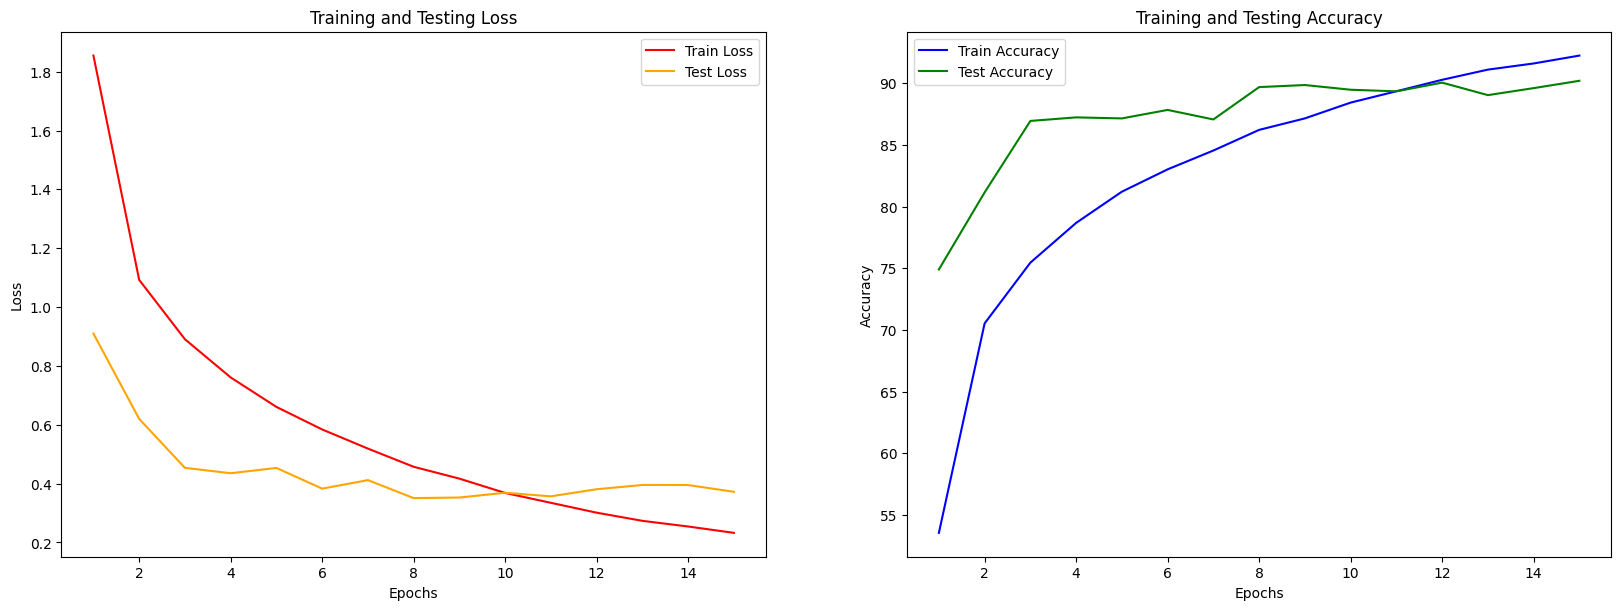

In [25]:
plt.figure(figsize=(20, 15))

nrows, ncols = 2, 2

plt.subplot(nrows, ncols, 1)
plt.plot(epochs_list, train_loss_list, color='red', label='Train Loss')
plt.plot(epochs_list, test_loss_list, color='orange', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.subplot(nrows, ncols, 2)
plt.plot(epochs_list, train_acc_list, color='blue', label='Train Accuracy')
plt.plot(epochs_list, test_acc_list, color='green', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.savefig('training_testing_plot.png', dpi=300, bbox_inches='tight')
plt.legend()

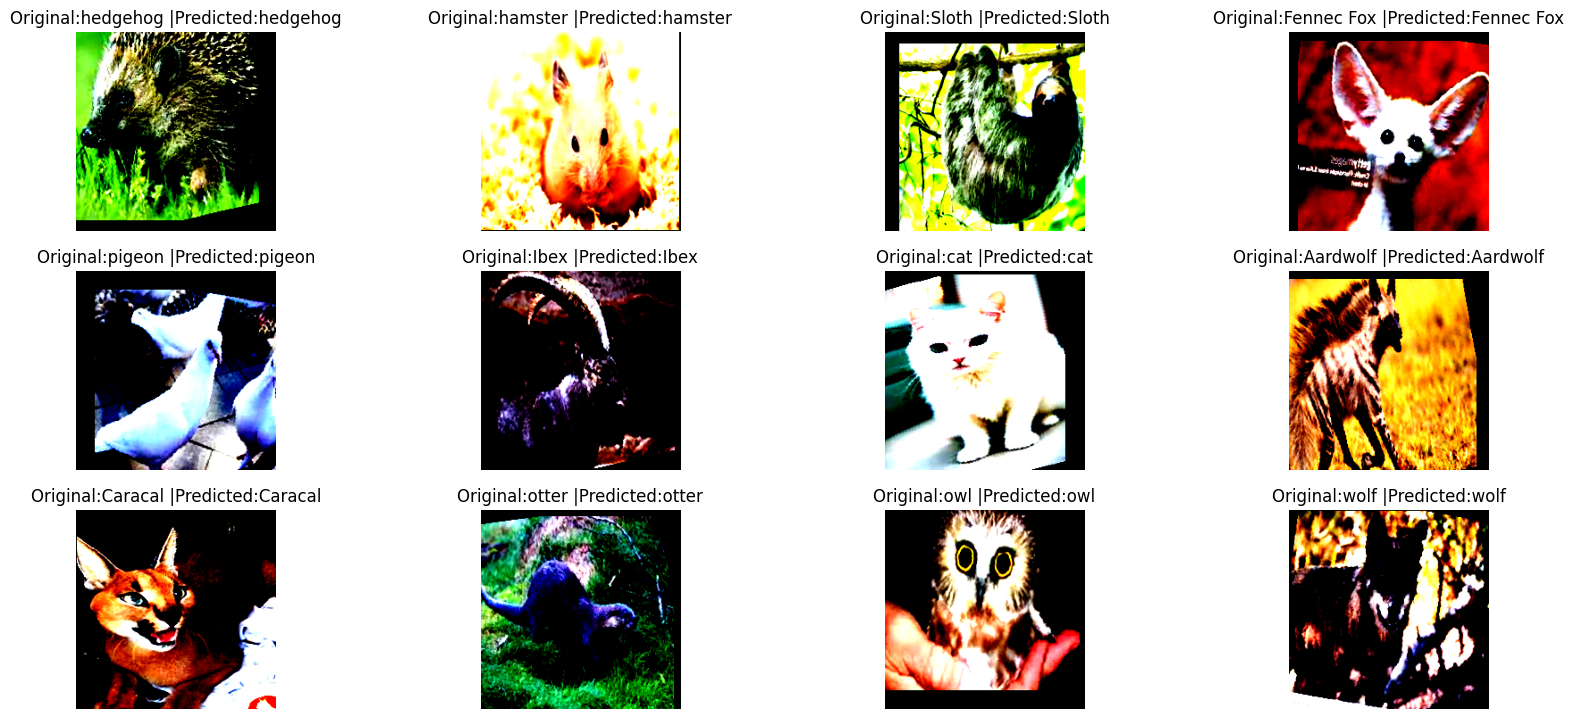

In [42]:
i=1
plt.figure(figsize=(20,15))
nrows,ncols=5,4
model.eval()
with torch.inference_mode():
    for i in range(1,13):
        idx=np.random.randint(0,len(test_dataset))
        img,label=test_dataset[idx]
        img=img.to(device)
        y_pred=model(img.unsqueeze(dim=0))
        y_label=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        plt.subplot(nrows,ncols,i)
        plt.imshow(img.squeeze().permute(1,2,0).cpu().numpy())
        plt.title(f'Original:{class_list[label]} |Predicted:{class_list[y_label]}')
        plt.axis('off')
        i+=1
    
    
plt.savefig('results-1.png')
    

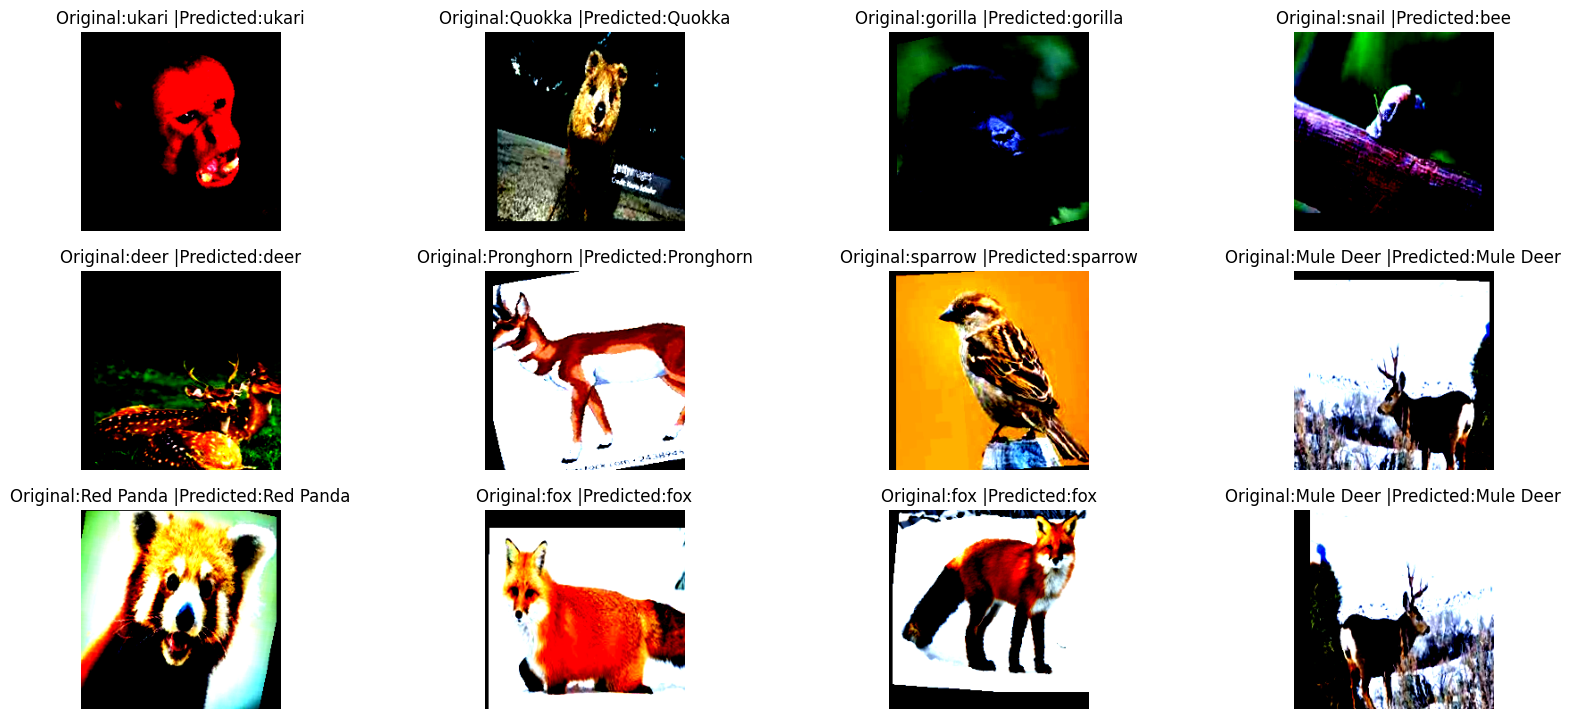

In [43]:
i=1
plt.figure(figsize=(20,15))
nrows,ncols=5,4
model.eval()
with torch.inference_mode():
    for i in range(1,13):
        idx=np.random.randint(0,len(test_dataset))
        img,label=test_dataset[idx]
        img=img.to(device)
        y_pred=model(img.unsqueeze(dim=0))
        y_label=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        plt.subplot(nrows,ncols,i)
        plt.imshow(img.squeeze().permute(1,2,0).cpu().numpy())
        plt.title(f'Original:{class_list[label]} |Predicted:{class_list[y_label]}')
        plt.axis('off')
        i+=1
    
    
plt.savefig('results-2.png')
    

In [44]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import  plot_confusion_matrix

In [46]:
y_preds=[]
model.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc='Making predictions'):
        X,y=X.to(device),y.to(device)
        y_logit=model(X)
        y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())



y_pred_tensor=torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions:   0%|          | 0/48 [00:00<?, ?it/s]

tensor([ 30,   0, 133, 122,  63,  53,  64,  61,  71, 121])

In [49]:
class_names=test_dataset.classes
class_names[:5]

['Aardwolf', 'Alpaca', 'Armadillo', 'Baboon', 'Bighorn Sheep']

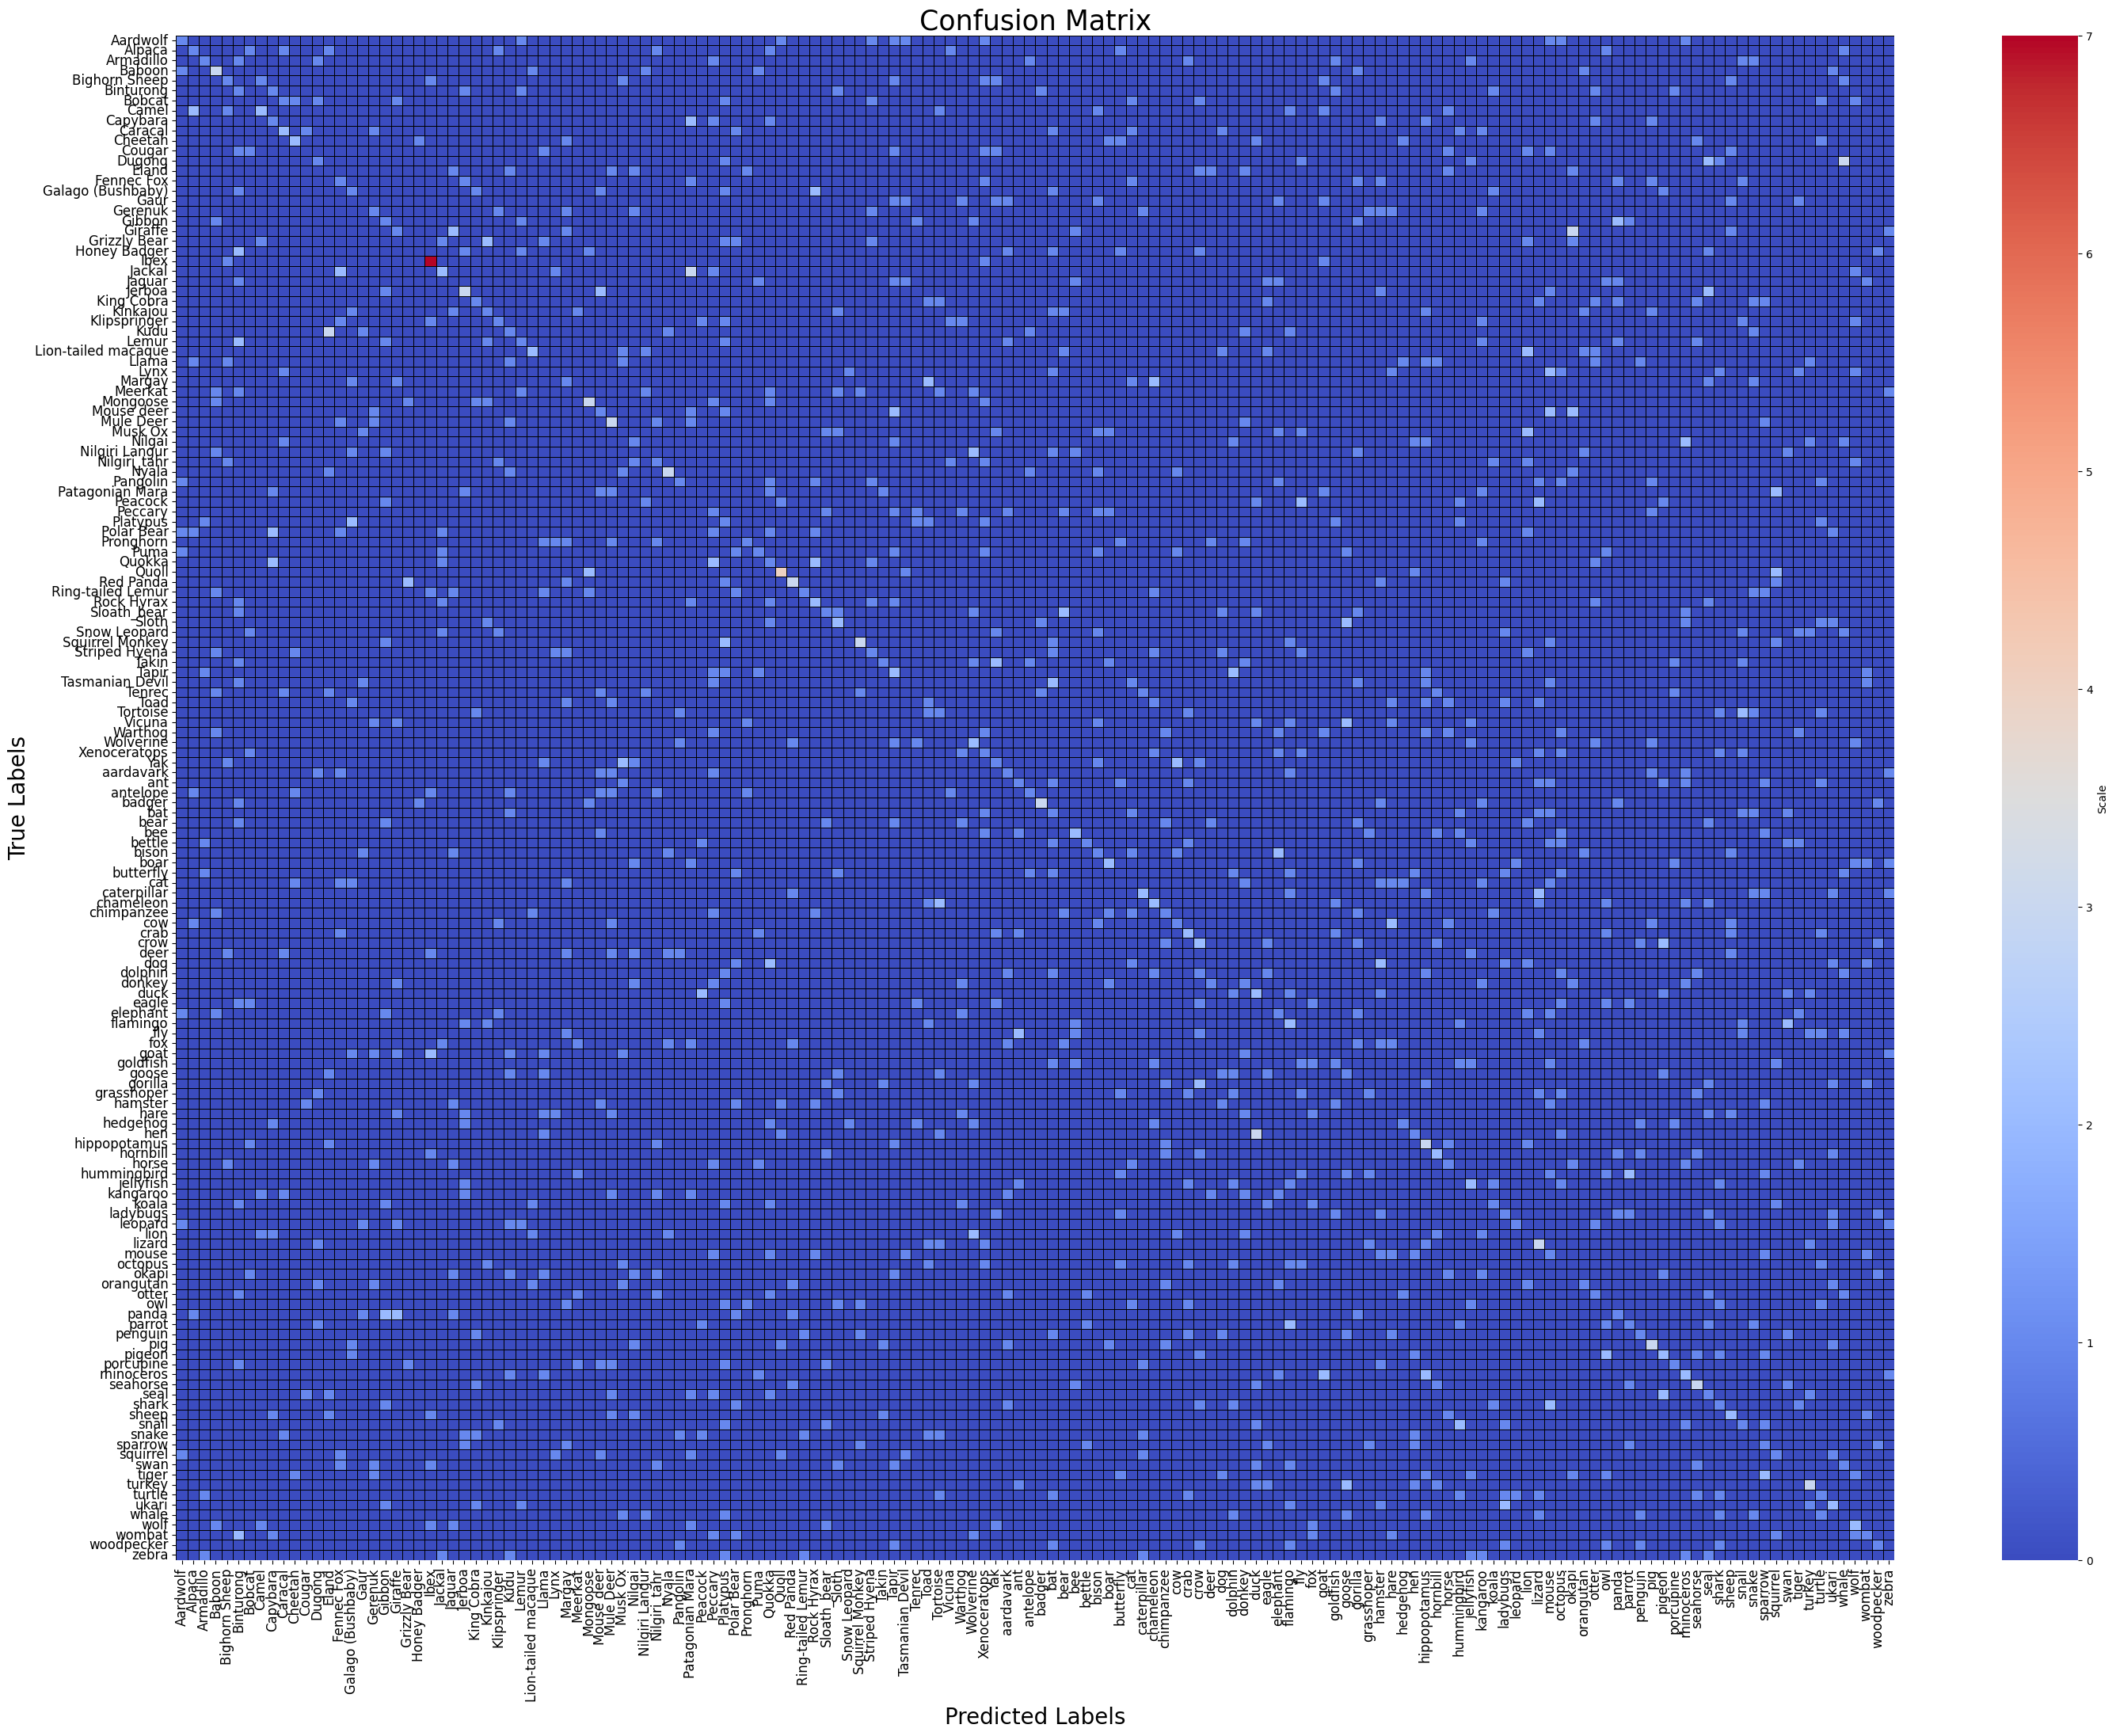

In [58]:
import torch
from torchmetrics import ConfusionMatrix
import matplotlib.pyplot as plt
import seaborn as sns


confmat = ConfusionMatrix(num_classes=len(class_list), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=torch.tensor(test_dataset.targets))


fig, ax = plt.subplots(figsize=(35, 25))


sns.heatmap(confmat_tensor.numpy(), 
            annot=False,            
            fmt="d", 
            cmap="coolwarm",      
            ax=ax, 
            xticklabels=class_names, 
            yticklabels=class_names, 
            cbar_kws={'label': 'Scale'},  
            linewidths=0.5,         
            linecolor='black')


ax.set_xlabel('Predicted Labels', fontsize=20)
ax.set_ylabel('True Labels', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=12)


plt.xticks(rotation=90)


plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')  


plt.show()


In [60]:
torch.save(obj=model.state_dict(),f='wildResNet.pth')

In [62]:
test_model=WildResNet(num_classes=len(class_list),resnet_weights=resnet_weights).to(device)
test_model.load_state_dict(torch.load('/kaggle/working/wildResNet.pth'))

<All keys matched successfully>

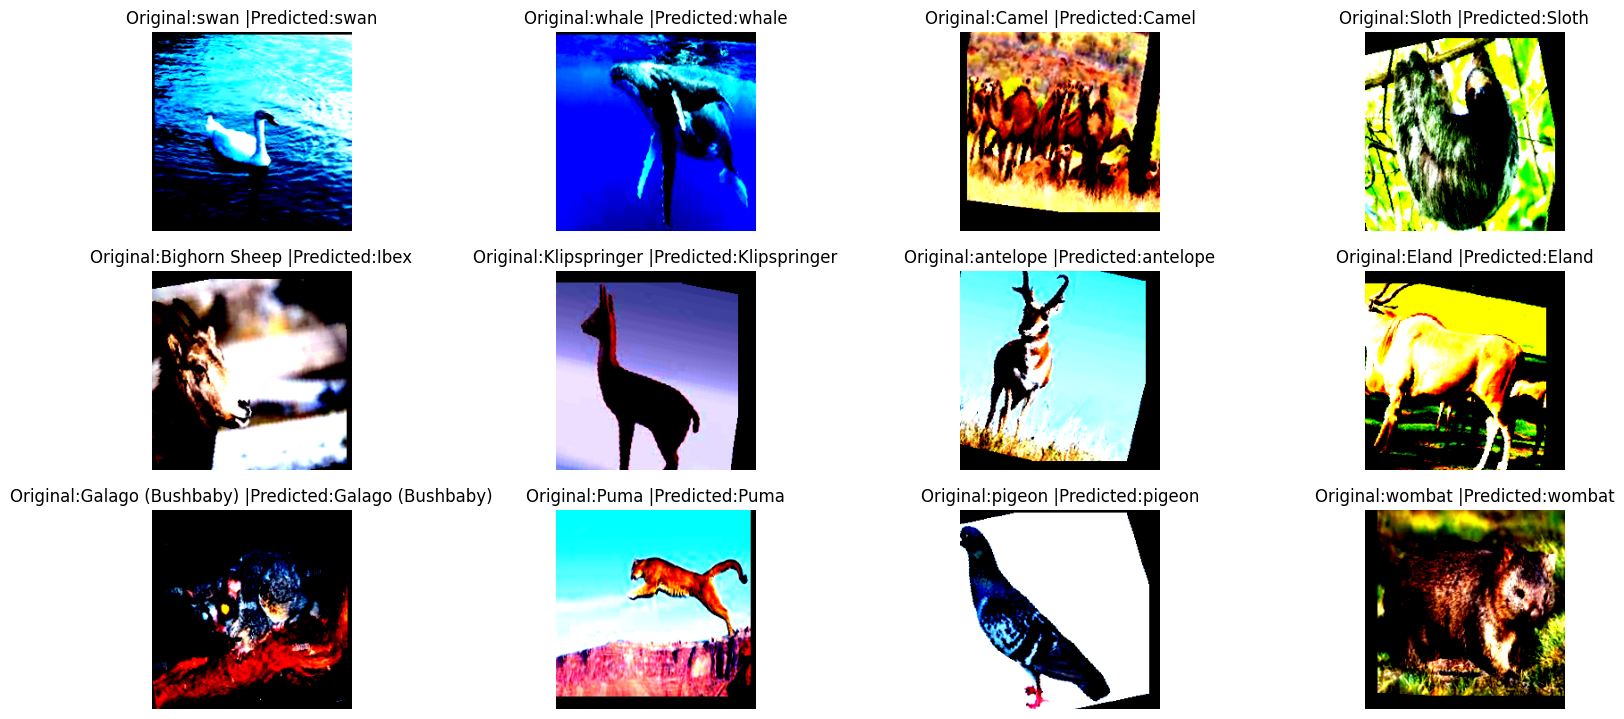

In [63]:
i=1
plt.figure(figsize=(20,15))
nrows,ncols=5,4
test_model.eval()
with torch.inference_mode():
    for i in range(1,13):
        idx=np.random.randint(0,len(test_dataset))
        img,label=test_dataset[idx]
        img=img.to(device)
        y_pred=test_model(img.unsqueeze(dim=0))
        y_label=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        plt.subplot(nrows,ncols,i)
        plt.imshow(img.squeeze().permute(1,2,0).cpu().numpy())
        plt.title(f'Original:{class_list[label]} |Predicted:{class_list[y_label]}')
        plt.axis('off')
        i+=1
    
    
plt.savefig('results-3.png')
    